## HW3
#### John Gabriel Cabatu-an
#### CMSC197-1
----

## Settings

In [936]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import random
from sklearn import preprocessing, model_selection, metrics, linear_model

# importing dataset
data = pd.read_csv("Advertising.csv", index_col=0)

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [937]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Standardizing Data

In [938]:
# separate the sales from the data
X = data.drop(columns=['Sales'])
Y = data['Sales']

Y_std = np.std(Y)
Y_mean = np.mean(Y)

# scale the predictors
X_scaled = preprocessing.scale(X)
Y_scaled = preprocessing.scale(Y)
X_scaled


array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

### Adding 1s

In [939]:
X_new = np.hstack((np.ones((X_scaled.shape[0],1)), X_scaled))
X_new

array([[ 1.00000000e+00,  9.69852266e-01,  9.81522472e-01,
         1.77894547e+00],
       [ 1.00000000e+00, -1.19737623e+00,  1.08280781e+00,
         6.69578760e-01],
       [ 1.00000000e+00, -1.51615499e+00,  1.52846331e+00,
         1.78354865e+00],
       [ 1.00000000e+00,  5.20496822e-02,  1.21785493e+00,
         1.28640506e+00],
       [ 1.00000000e+00,  3.94182198e-01, -8.41613655e-01,
         1.28180188e+00],
       [ 1.00000000e+00, -1.61540845e+00,  1.73103399e+00,
         2.04592999e+00],
       [ 1.00000000e+00, -1.04557682e+00,  6.43904671e-01,
        -3.24708413e-01],
       [ 1.00000000e+00, -3.13436589e-01, -2.47406325e-01,
        -8.72486994e-01],
       [ 1.00000000e+00, -1.61657614e+00, -1.42906863e+00,
        -1.36042422e+00],
       [ 1.00000000e+00,  6.16042873e-01, -1.39530685e+00,
        -4.30581584e-01],
       [ 1.00000000e+00, -9.45155670e-01, -1.17923146e+00,
        -2.92486143e-01],
       [ 1.00000000e+00,  7.90028350e-01,  4.96973404e-02,
      

### Dividing the training data

In [940]:
X_train, X_test, Y_train, Y_test =  model_selection.train_test_split(X_new, Y_scaled, test_size=0.25, train_size=0.75)
Y_train

array([ 1.95555812,  0.99483195, -0.61918802,  0.76425767, -0.65761706,
       -1.00347849,  0.1301784 ,  0.49525434, -0.90740587,  0.86033029,
       -0.40782826,  1.99398717, -0.44625731, -1.02269301, -0.58075897,
        1.47519504, -0.21568303,  1.55205313,  1.76341289,  0.62975601,
       -1.23405277,  0.28389458, -0.40782826, -1.77205942,  1.64812575,
       -1.56069967,  0.18782197, -1.04190753, -0.42704278,  1.37912242,
        2.20534693,  0.03410578,  0.22625101,  1.07169004,  1.09090457,
        0.36075268, -0.71526063, -0.38861374,  0.93718838, -1.40698348,
       -0.44625731, -1.23405277,  0.36075268, -0.8497623 , -0.23489755,
       -1.59912871, -0.31175564, -0.5231154 ,  0.28389458, -0.59997349,
        1.49440956, -1.31091086,  2.1861324 ,  0.76425767, -1.15719467,
       -0.48468635,  0.59132696,  2.49356478, -0.63840254,  1.57126765,
       -0.61918802,  0.32232363,  0.18782197, -0.75368968, -0.33097017,
       -0.11961041,  0.64897053,  0.28389458, -0.11961041,  0.36

### Fitting the model

In [941]:
# initializing weights
def initialize_weights():
	rand = [random(), random()]
	# return np.linspace(min(rand), max(rand), 4)
	return [0,0,0,0]

def predict(X, Beta):
	return np.matmul(X, Beta)

def compute_cost(y_hat, y):
	# sq = np.square(y_hat-y)
	# return sq.sum()/(2*len(y))
	return np.square(y_hat-y).mean()

def compute_gradient(y_hat, y, x):
	temp=[]
	
	for i in range(x.shape[1]):
		sum=0
		for j in range(x.shape[0]):
			sum += (y_hat[j]-y[j])*x[j][i]
		temp.append(sum)

	temp = np.array(temp)
	return ((temp*2)/x.shape[0])

def update_weights(curr_w, w, lrate=0.1):
	return curr_w - (w*lrate)

def grad_descent(X_train, Y_train, iter=5, lrate=0.1):
	w=initialize_weights()
	cost_per_iteration=[]
	r2_score_per_iteration=[]
	for i in range(iter):
		# perform predictions
		prediction=predict(X_train, w)

		cost_per_iteration.append(compute_cost(prediction, Y_train.tolist()))

		# computer new weights
		w_new = compute_gradient(predict(X_train, w), Y_train.tolist(), X_train)

		#r2_score
		r2_score_per_iteration.append(metrics.r2_score(Y_train,prediction))

		# update weights
		w = update_weights(w, w_new, lrate=lrate)
	
	return w, cost_per_iteration, r2_score_per_iteration


def plot_cost(data):
	plt.plot(range(len(data)), data)
	plt.xlabel('iterations')
	plt.ylabel('cost')
	plt.show()

In [942]:
trained_weights = grad_descent(X_test, Y_test, lrate=0.1, iter=25)

# predict for Y in train set
set_train = predict(X_train, trained_weights[0])

# predict for Y in test set
set_test = predict(X_test, trained_weights[0])

print("train set costs: ", compute_cost(set_train, Y_train))
print("test set costs: ", compute_cost(set_test, Y_test))

# accuracy test
# test = [((set_test*Y_std)+Y_mean), ((Y_test*Y_std)+Y_mean)]
# sumt = 0
# for i in range(len(test[0])):
# 	temp = [test[0][i], test[1][i]]
# 	sumt += min(temp)/max(temp)
# perc = sumt/len(test[0])

# print(perc)


train set costs:  0.11771556278973216
test set costs:  0.087250158916916


## QUESTIONS:

1. What are the optimal weights found by your implemented gradient descent?

In [943]:
w_q1 = trained_weights[0]
print(f'h_theta(x) = {w_q1[0]} + {w_q1[1]} TV + {w_q1[2]} RADIO + {w_q1[3]} Newspaper')

h_theta(x) = -0.025457704840807407 + 0.6942839950859662 TV + 0.5214682782750412 RADIO + -0.050081806477680305 Newspaper


2. Provide a scatter plot of the 1𝑦 (,)5 2 𝑎𝑛𝑑 𝑦 (() for both the train and test set. Is there a
trend? Provide an r2 score (also available in sklearn).

<function matplotlib.pyplot.show(close=None, block=None)>

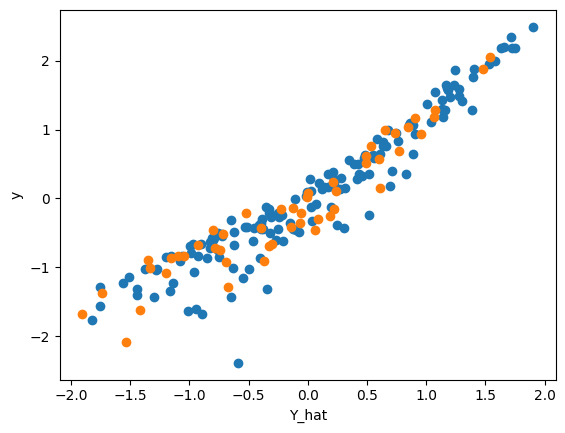

In [944]:
plt.scatter(set_train, Y_train)
plt.scatter(set_test, Y_test)
plt.xlabel('Y_hat')
plt.ylabel('y')
plt.show

In [945]:
set_train_rscore = metrics.r2_score(Y_train, set_train)
set_test_rscore = metrics.r2_score(Y_test, set_test)

print('train set r2 score: ', set_train_rscore)
print('test set r2 score: ', set_test_rscore)

train set r2 score:  0.8878581419818636
test set r2 score:  0.8934923001852155


- The scatterplot is observed to have a non-random distrubution.

3. What happens to the error, r2, and cost as the number of iterations increase? Show your
data and proof. You can alternatively plot your result data for visualization and check
until 50000 iterations or more (actually)

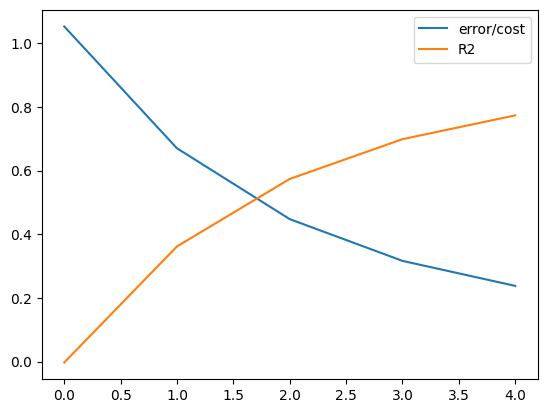

In [946]:
iterations_1=5
trained_weights_q3_1 = grad_descent(X_train, Y_train, iter=iterations_1)

# error/cost
plt.plot( range(iterations_1), trained_weights_q3_1[1], label="error/cost")

#R2
plt.plot(range(iterations_1), trained_weights_q3_1[2], label="R2")

plt.legend()
plt.show()

# NOTE: error and cost have the same formula so I merged them into one

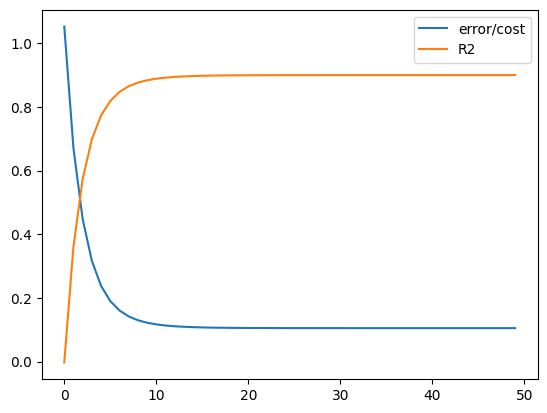

In [947]:
iterations_2=50
trained_weights_q3_2 = grad_descent(X_train, Y_train, iter=iterations_2)
plt.plot( range(iterations_2), trained_weights_q3_2[1], label="error/cost")
plt.plot(range(iterations_2), trained_weights_q3_2[2], label="R2")

plt.legend()
plt.show()


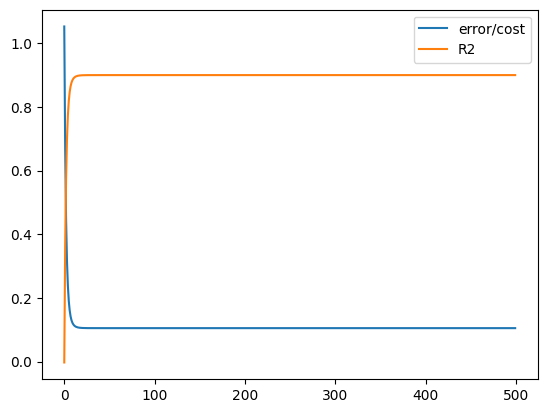

In [948]:
iterations3=500
trained_weights_q3_3 = grad_descent(X_train, Y_train, iter=iterations3)
plt.plot( range(iterations3), trained_weights_q3_3[1], label="error/cost")
plt.plot(range(iterations3), trained_weights_q3_3[2], label="R2")

plt.legend()
plt.show()

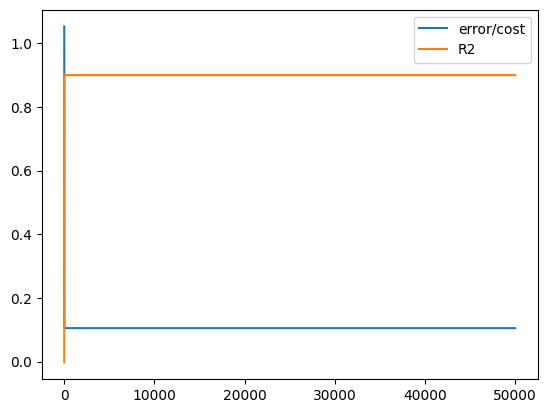

In [949]:
iterations4=50000
trained_weights_q3_4 = grad_descent(X_train, Y_train, iter=iterations4)
plt.plot( range(iterations4), trained_weights_q3_4[1], label="error/cost")
plt.plot(range(iterations4), trained_weights_q3_4[2], label="R2")

plt.legend()
plt.show()

- Based on the graphs we can tell that as the iterations increases the error or cost approaches 0 and the R2 score approches 1 however the graph plateaus at about iteration 20-30

4. Once you determine the optimal number of iterations, check the effect on the cost and
error as you change the learning rate. The common learning rates in machine learning
include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize
the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE
PLOT. Provide your analysis.

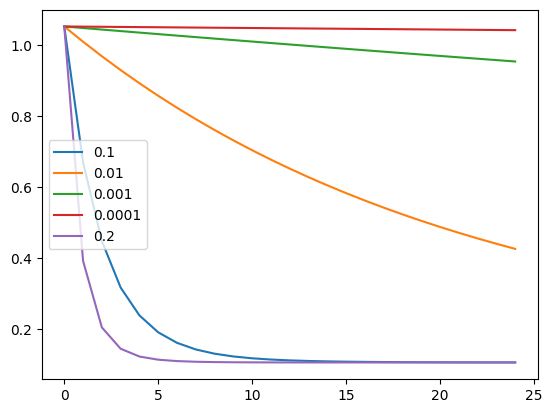

In [950]:
iter_optimal = 25
lrate_arr = [0.1, 0.01, 0.001, 0.0001, 0.2]
iter_arr = range(iter_optimal)

for lrate in lrate_arr:
	plt.plot(iter_arr, grad_descent(X_train, Y_train, iter=iter_optimal, lrate=lrate)[1], label=lrate)

plt.legend()
plt.show()

- as observed, as the learning rate decreases the error goes down slowly also. If the learning rate is too small there could be a need of more iterations but if it is too big it might go over the optimal weights.

5. Is there a relationship on the learning rate and the number of iterations?

- The learning rate depends on the number of iteration to come up with the optimal values for the weights. If there are a lot of iterations but the learning rate is too small it might not come up with the optimal values at all.

6. Compare the results with the results of ordinary least squares function.

In [951]:
lr = linear_model.LinearRegression()
lr.fit(X_train, Y_train)
print(f"using least squares: \t\t {lr.coef_}")
print(f"using gradient_descent: \t {trained_weights[0]}" )

using least squares: 		 [0.         0.76738862 0.53606959 0.01522118]
using gradient_descent: 	 [-0.0254577   0.694284    0.52146828 -0.05008181]
